In [37]:
!pip install pandas numpy matplotlib seaborn scikit-learn plotly


In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split



In [39]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

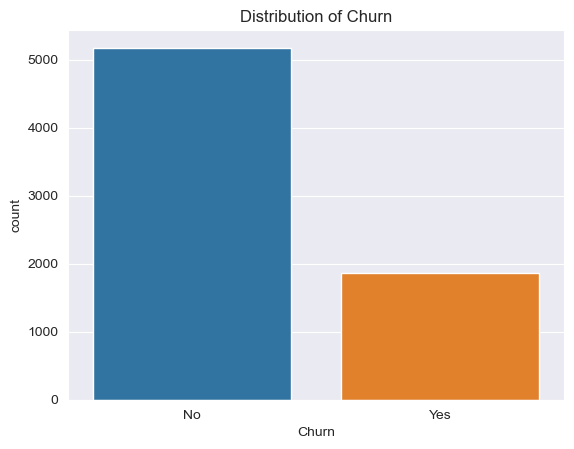

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [40]:
# Distribution of the target variable
plt.title('Distribution of Churn')
sns.countplot(x='Churn', data=df)
plt.show()


# Summary statistics
print(df.describe())

# Checking for missing values
print(df.isnull().sum())

In [41]:
churn_counts = df['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'count']
fig = px.bar(churn_counts, x='Churn', y='count', title='Distribution of Churn')
fig.show()

In [45]:
#Encoding variaveis categoricas
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])
    
# Escalando as features numéricas
scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


# Dividindo o dataset
X = df.drop(columns = ['Churn', 'customerID'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
# Inicialização do modelo
model = RandomForestClassifier(random_state=42)

# Treinamento do modelo
model.fit(X_train, y_train)

# Predição
y_pred = model.predict(X_test)

# Avaliação do modelo
print("Precisão: ", accuracy_score(y_test, y_pred))
print("Matriz de confusão: ", confusion_matrix(y_test, y_pred))
print("Relatório de classificação: ", classification_report(y_test, y_pred))

Precisão:  0.7977288857345636
Matriz de confusão:  [[949  87]
 [198 175]]
Relatório de classificação:                precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [49]:
# Importância das features
feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)
# Plotando a importância das features
fig = px.bar(feature_importances, x = feature_importances.index, y = 'importance', title = 'Importância das features')
fig.show()

                  importance
MonthlyCharges      0.176906
tenure              0.173502
TotalCharges        0.168442
Contract            0.081254
PaymentMethod       0.051348
OnlineSecurity      0.048782
TechSupport         0.043704
OnlineBackup        0.027751
gender              0.027438
PaperlessBilling    0.025961
InternetService     0.024358
Partner             0.023640
MultipleLines       0.023091
DeviceProtection    0.021314
Dependents          0.021005
SeniorCitizen       0.020916
StreamingMovies     0.017982
StreamingTV         0.017041
PhoneService        0.005564


In [50]:
# Correlação entre as features no mapa de calor
fig = go.Figure(data=go.Heatmap(
    z=df.corr().values,
    x=df.corr().columns,
    y=df.corr().columns,
    colorscale='Viridis',
))
fig.update_layout(title= 'Correlação no Mapa de Calor')
fig.show()